<a href="https://colab.research.google.com/github/E-girgen/Thesis-Data-Science-Society/blob/main/SVM_Not_preprocessed_Captions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/"
%cd "/content/drive/MyDrive/Colab Notebooks"

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
data = pd.read_csv("cleaned_captions_np.csv")



In [ ]:
df = data[data['Category'] != 'other']
nd = df[[ 'Text', 'Category']]
nd.reset_index(drop=True, inplace=True)
print(nd.head())

                                                Text Category
0  Kweenie of da gij al es goed hebt stilgestaan ...  neutral
1                                             Santé.      joy
2  Ja kvind wel spannend. Das zo ineens euh de vu...     fear
3  Als ik één dag werk in, in, in de horecazaak w...    anger
4  Een baas is een baas he, die moet je respecter...    anger


In [ ]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
nd['Category'] = label_encoder.fit_transform(nd['Category'])

In [ ]:
label_encodings = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_encodings)

{'anger': 0, 'fear': 1, 'joy': 2, 'love': 3, 'neutral': 4, 'sadness': 5}


In [ ]:
nd["Text"]

0      Kweenie of da gij al es goed hebt stilgestaan ...
1                                                 Santé.
2      Ja kvind wel spannend. Das zo ineens euh de vu...
3      Als ik één dag werk in, in, in de horecazaak w...
4      Een baas is een baas he, die moet je respecter...
                             ...                        
995    Jah ze werken harder eh als wij in België, en ...
996    Ah gij. Wa een ramp zijt gij. Allemaal hetzelfde.
997    Der sta Lego van Lord of the Rings, van Star W...
998                    Nu zijn we precies aant kamperen.
999    Ik heb euh ooit es… bja ik swing op elk feestj...
Name: Text, Length: 1000, dtype: object

In [ ]:
import seaborn as sns
import re
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

Fold 10 - Nauwkeurigheid: 0.42, Precisie: 0.33765000431667097, Recall: 0.3216695148159245, F1-Score: 0.31901947540245407
Classificatie Rapport:
              precision    recall  f1-score   support

           0       0.41      0.55      0.47        20
           1       0.22      0.22      0.22         9
           2       0.49      0.61      0.54        31
           3       0.00      0.00      0.00         4
           4       0.27      0.18      0.21        17
           5       0.64      0.37      0.47        19

    accuracy                           0.42       100
   macro avg       0.34      0.32      0.32       100
weighted avg       0.42      0.42      0.41       100



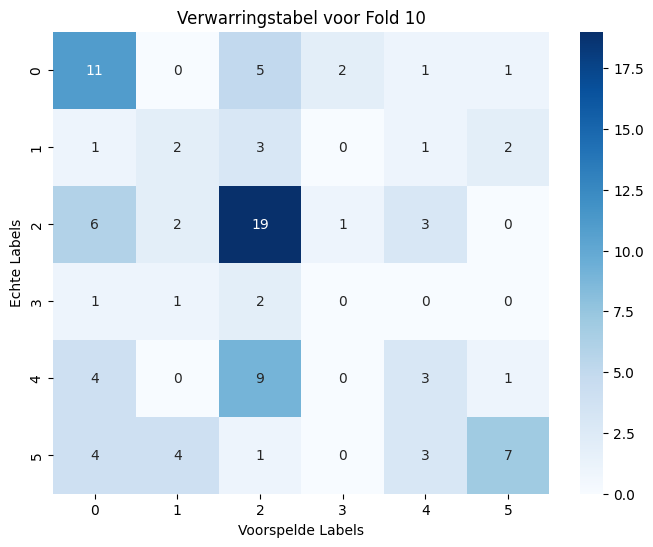


Gemiddelde scores over alle folds - Nauwkeurigheid: 0.42, Precisie: 0.33765000431667097, Recall: 0.3216695148159245, F1-Score: 0.31901947540245407


In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Initialiseer een TfidfVectorizer
vectorizer = TfidfVectorizer()

fold_number = 10

# Transformeer de tekst naar vectoren
X_tfidf = vectorizer.fit_transform(nd['Text'])
y_labels = nd['Category']

# Initialiseer een LabelEncoder
label_encoder = LabelEncoder()

# Encodeer de categorieën naar numerieke waarden
y_labels_encoded = label_encoder.fit_transform(y_labels)

# Initialiseer het Support Vector Machine-model
svm = SVC()

# Definieer het parametergrid voor GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [3, 5, 7],
    'coef0': [0, 1, 3]
}

# Initialiseer K-Fold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=2022)

# Initialiseer GridSearchCV met 10-fold cross-validation en f1-macro als score
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=kf, scoring='f1_macro')

# Lijsten om resultaten per fold op te slaan
accuracies = []
precisions = []
recalls = []
f1_scores = []
conf_matrices = []

# Loop over de folds
for fold, (train_idx, test_idx) in enumerate(kf.split(X_tfidf)):
    if fold == fold_number - 1:  # Indexen zijn 0-gebaseerd, daarom -1
        X_train, X_test = X_tfidf[train_idx], X_tfidf[test_idx]
        y_train, y_test = y_labels_encoded[train_idx], y_labels_encoded[test_idx]

        # Voer GridSearchCV uit op de trainingsdata
        grid_search.fit(X_train, y_train)

        # Haal de beste parameters op
        best_params = grid_search.best_params_

        # Gebruik de beste parameters in je definitieve model
        final_svm = SVC(**best_params)

        # Train het model op de trainingsdata
        final_svm.fit(X_train, y_train)

        # Voorspel de categorieën op de testset
        y_pred = final_svm.predict(X_test)

        # Decodeer de voorspelde labels terug naar de originele tekstuele categorieën
        y_test_decoded = label_encoder.inverse_transform(y_test)
        y_pred_decoded = label_encoder.inverse_transform(y_pred)

        # Bereken en sla de metingen op
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        conf_matrix = confusion_matrix(y_test, y_pred)

        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        conf_matrices.append(conf_matrix)

        print(f"Fold {fold + 1} - Nauwkeurigheid: {accuracy}, Precisie: {precision}, Recall: {recall}, F1-Score: {f1}")

        # Druk het classificatie rapport af
        print("Classificatie Rapport:")
        print(classification_report(y_test_decoded, y_pred_decoded))

        # Plot de verwarringstabel als een heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
        plt.xlabel('Voorspelde Labels')
        plt.ylabel('Echte Labels')
        plt.title(f'Verwarringstabel voor Fold {fold + 1}')
        plt.show()

# Gemiddelde scores over alle folds
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

print(f"\nGemiddelde scores over alle folds - Nauwkeurigheid: {avg_accuracy}, Precisie: {avg_precision}, Recall: {avg_recall}, F1-Score: {avg_f1}")


In [ ]:
final_svm

SVC(C=10, coef0=0, kernel='sigmoid')

With smote

Fold 10 - Accuracy: 0.41, Precision: 0.3386363636363636, Recall: 0.3143681732266572, F1-Score: 0.31582087744006787
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.50      0.45        20
           1       0.18      0.22      0.20         9
           2       0.50      0.61      0.55        31
           3       0.00      0.00      0.00         4
           4       0.33      0.24      0.28        17
           5       0.60      0.32      0.41        19

    accuracy                           0.41       100
   macro avg       0.34      0.31      0.32       100
weighted avg       0.43      0.41      0.41       100



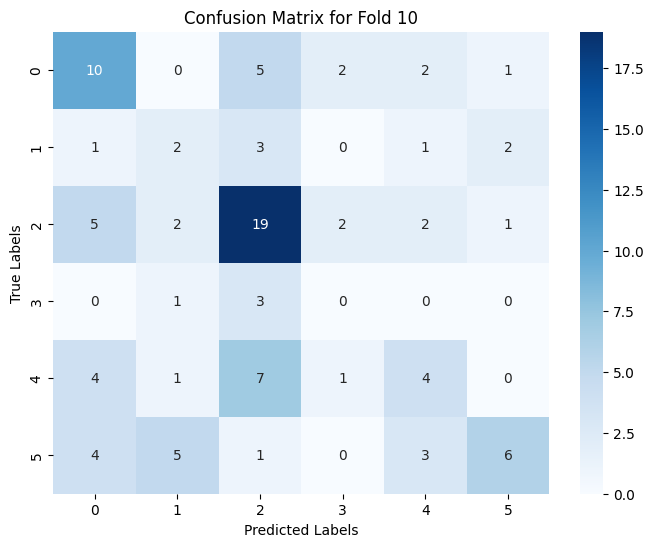


Average scores across all folds - Accuracy: 0.41, Precision: 0.3386363636363636, Recall: 0.3143681732266572, F1-Score: 0.31582087744006787


In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Initialize a TfidfVectorizer
vectorizer = TfidfVectorizer()

fold_number = 10

# Transform text to vectors
X_tfidf = vectorizer.fit_transform(nd['Text'])
y_labels = nd['Category']

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Encode the categories into numerical values
y_labels_encoded = label_encoder.fit_transform(y_labels)

# Initialize the Support Vector Machine model
svm = SVC()

# Initialize K-Fold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=2022)

# Initialize GridSearchCV with 10-fold cross-validation and f1-macro as the scoring metric
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=kf, scoring='f1_macro')

# Lists to store results per fold
accuracies = []
precisions = []
recalls = []
f1_scores = []
conf_matrices = []

# Loop over the folds
for fold, (train_idx, test_idx) in enumerate(kf.split(X_tfidf)):
    if fold == fold_number - 1:  # Indexes are 0-based, hence -1
        X_train, X_test = X_tfidf[train_idx], X_tfidf[test_idx]
        y_train, y_test = y_labels_encoded[train_idx], y_labels_encoded[test_idx]

        # Apply SMOTE to balance the class distribution
        smote = SMOTE(random_state=2022)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # Use the best parameters in your final model
        final_svm = SVC(**best_params)

        # Train the model on the resampled training data
        final_svm.fit(X_train_resampled, y_train_resampled)

        # Predict categories on the test set
        y_pred = final_svm.predict(X_test)

        # Decode the predicted labels back to the original textual categories
        y_test_decoded = label_encoder.inverse_transform(y_test)
        y_pred_decoded = label_encoder.inverse_transform(y_pred)

        # Calculate and store the metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        conf_matrix = confusion_matrix(y_test, y_pred)

        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        conf_matrices.append(conf_matrix)

        print(f"Fold {fold + 1} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

        # Print the classification report
        print("Classification Report:")
        print(classification_report(y_test_decoded, y_pred_decoded))

        # Plot the confusion matrix as a heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title(f'Confusion Matrix for Fold {fold + 1}')
        plt.show()

# Average scores across all folds
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

print(f"\nAverage scores across all folds - Accuracy: {avg_accuracy}, Precision: {avg_precision}, Recall: {avg_recall}, F1-Score: {avg_f1}")

In [ ]:
best_params

{'C': 10, 'coef0': 0, 'degree': 3, 'kernel': 'linear'}

In [ ]:
example_sentence = "Zeker, zeker. Dan ruïneert hij mijn leven gewoon en dan gaat het sowieso niet de goeie kant op. Hier is het rechtssysteem, vergeleken met Nederland, zit hier echt heel scheef in elkaar."
example_sentence_tfidf = vectorizer.transform([example_sentence])
example_pred = final_svm.predict(example_sentence_tfidf)
print(f"Voorspelde emotie voor de voorbeeldzin: {example_pred[0]}")
